<a href="https://colab.research.google.com/github/tak-creator/giganci/blob/main/Projekt_Logika_Rozmyta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


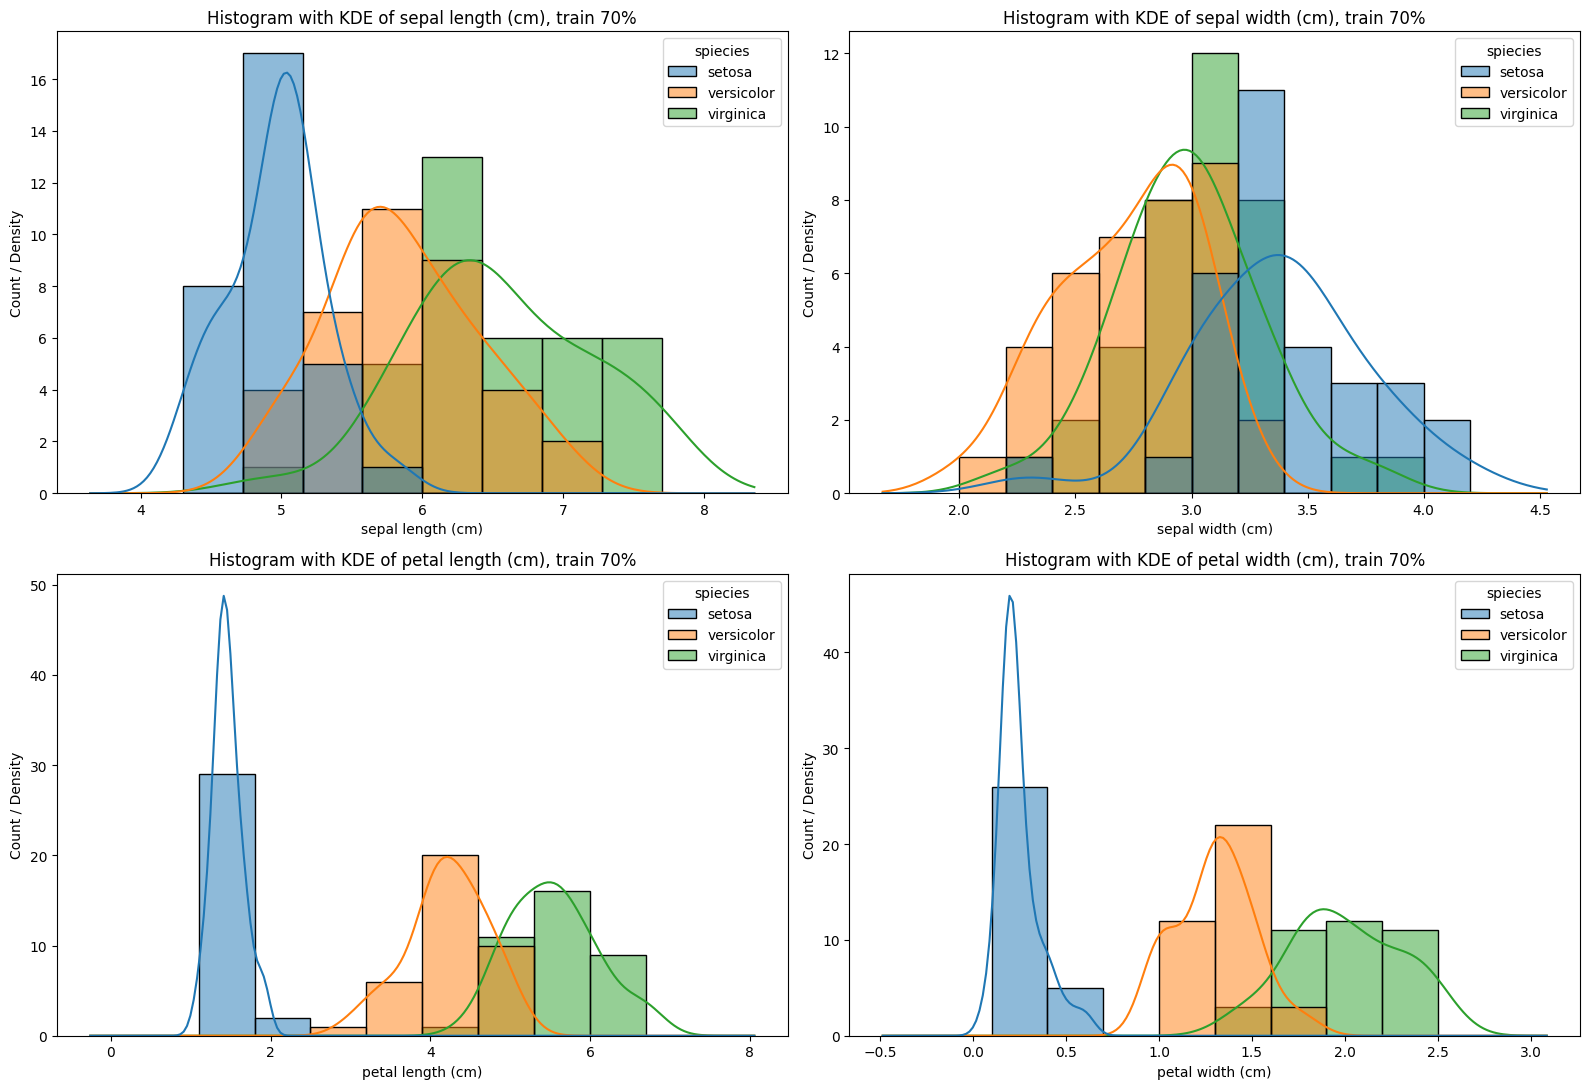

Peak: 5.012424849699398
Peak: 5.745891783567135
Peak: 6.409018036072145
Peak: 3.402605210420842
Peak: 2.8977955911823647
Peak: 2.9823647294589177
Peak: 1.4509018036072143
Peak: 4.472945891783567
Peak: 5.500400801603206
Peak: 0.20120240480961923
Peak: 1.3350701402805611
Peak: 1.8937875751503006

Podsumowanie analizy KDE:
              Feature    Spiecies  start       end
0   sepal length (cm)      setosa    4.3  0.160654
1   sepal length (cm)  versicolor    4.9  0.157450
2   sepal length (cm)   virginica    4.9  0.145171
3    sepal width (cm)      setosa    2.3  0.085135
4    sepal width (cm)  versicolor    2.0  0.191224
5    sepal width (cm)   virginica    2.2  0.133098
6   petal length (cm)      setosa    1.0  0.218362
7   petal length (cm)  versicolor    3.0  0.193006
8   petal length (cm)   virginica    4.5  0.100484
9    petal width (cm)      setosa    0.1  0.185002
10   petal width (cm)  versicolor    1.0  0.162677
11   petal width (cm)   virginica    1.4  0.485951


In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install scikit-fuzzy scikit-learn scipy matplotlib seaborn pandas numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

## Ładowanie i przygotowanie danych

# Załadowanie zbioru danych Iris
iris = load_iris()

# Konwersja danych do DataFrame pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Dodanie kolumny 'spiecies' z nazwami gatunków
df['spiecies'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Podział danych na zbiór treningowy (70%) i testowy (30%)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Definicja nazw cech i gatunków
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
spiecies = iris.target_names

## Wizualizacja danych (Histogramy z KDE)

# Tworzenie figury do wykresów
plt.figure(figsize=(16, 11))

# Generowanie histogramów z nałożonymi krzywymi KDE dla każdej cechy, z podziałem na gatunki
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i) # Tworzenie subplota (siatka 2x2)

    # Rysowanie histogramu z KDE nałożonym na wierzchu
    sns.histplot(
        data=df_train,
        x=feature,
        hue='spiecies',
        kde=True,  # Włączanie rysowania krzywej KDE
        kde_kws={'cut': 2} # Dostosowanie zasięgu KDE
    )

    plt.title(f'Histogram with KDE of {feature}, train 70%')
    plt.xlabel(feature)
    plt.ylabel('Count / Density') # Zmiana opisu osi Y, ponieważ KDE to gęstość

# Dopasowanie układu subplotów i wyświetlenie figury
plt.tight_layout()
plt.show()

# Definicja funkcji do analizy KDE (pozostawiamy dla analizy liczbowej)
def analize_kde(vaules):
  kde = gaussian_kde(vaules)
  x_eval = np.linspace(vaules.min(), vaules.max(),500)
  y_eval = kde(x_eval)
  peak = x_eval[np.argmax(y_eval)]
  print(f'Peak: {peak}')
  return x_eval[0], y_eval[-1], x_eval, y_eval

# Słownik do przechowywania wyników analizy KDE (bez rysowania wykresów KDE osobno)
results = {}
for feature in features:
  results[feature] = {}
  for spiecie in spiecies:
    vals = df[df["spiecies"] == spiecie][feature].values
    start, end, x_kde, y_kde = analize_kde(vals)
    results[feature][spiecie] = {
        "start": start,
        "end": end,
        "x_kde": x_kde,
        "y_kde": y_kde
    }

# Tworzenie DataFrame podsumowującego wyniki analizy KDE
sumary_df = pd.DataFrame([{"Feature": f, "Spiecies": s, "start": vals["start"], "end": vals["end"]}
for f, d in results.items()
  for s, vals in d.items()
])

# Wyświetlenie podsumowania
print("\nPodsumowanie analizy KDE:")
print(sumary_df)

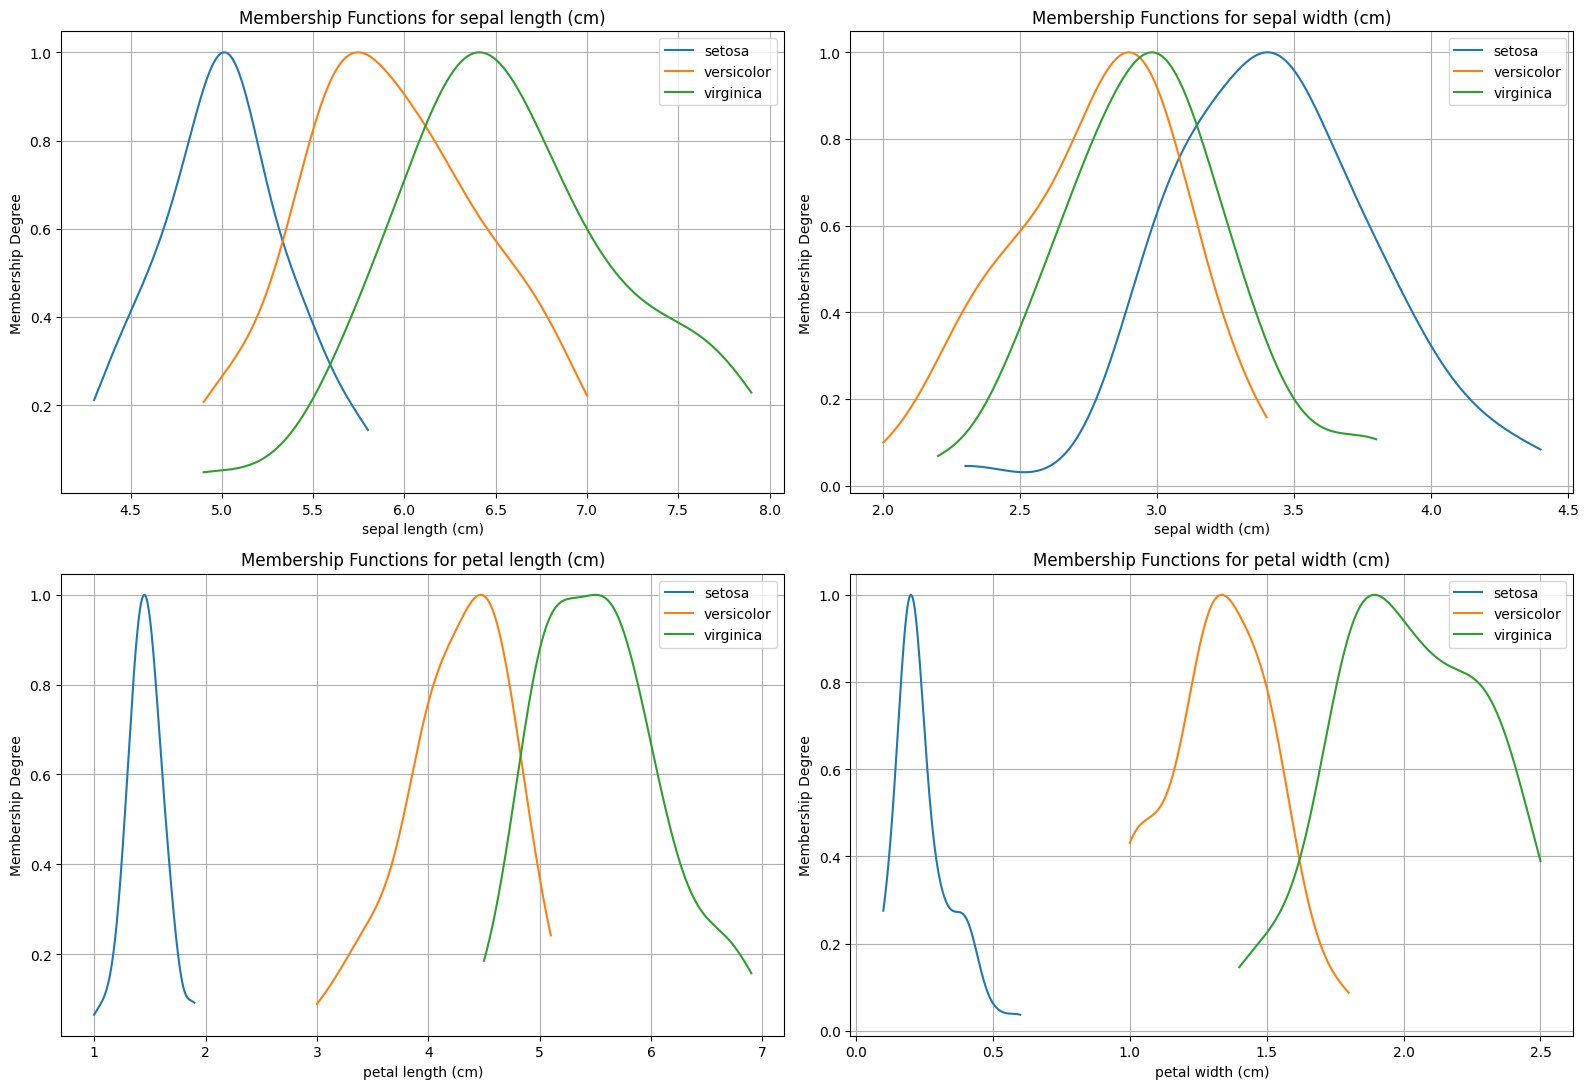